## Importing requisite libraries

In [22]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error

In [23]:
os.getcwd()

'/Users/urvi.midha/Documents/UM_Documents/Urvi_Midha/PGDDSAI/Trimester 3/Applications of ML/ml-latest-small'

## Reading the data

In [24]:
ratings=pd.read_csv('ratings.csv')

In [25]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [26]:
df=ratings.iloc[:,:-1]
df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [27]:
# unique ratings
df['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [28]:
# number of ratings
len(df)

100836

In [29]:
# number of unique users
len(df['userId'].unique())

610

In [30]:
# number of unique movies
len(df['movieId'].unique())

9724

## Stratified k folds

In [31]:
# Assigning X as the original ratings dataframe and y as the user_id column of ratings.
# We take y as 'userId' just to ensure that the splitting leads to stratified sampling

X = df.copy()
y = df['userId']

skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)
print(skf)

# StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
i=1
for train_index, test_index in skf.split(X, y):
    print("\nFold: ",i)
    print("TRAIN:", train_index, " having: ", len(train_index) )
    print("TEST:", test_index, " having: ", len(test_index) )  
    #print(X.loc[train_index])
    for train_index, test_index in skf.split(X, y):
        X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[train_index], y.loc[test_index], y.loc[test_index]
    
    i+=1
    print("------------------------------------")
    

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

Fold:  1
TRAIN: [    47     48     49 ... 100833 100834 100835]  having:  80668
TEST: [    0     1     2 ... 99792 99793 99794]  having:  20168
------------------------------------

Fold:  2
TRAIN: [     0      1      2 ... 100833 100834 100835]  having:  80669
TEST: [    47     48     49 ... 100052 100053 100054]  having:  20167
------------------------------------

Fold:  3
TRAIN: [     0      1      2 ... 100833 100834 100835]  having:  80669
TEST: [    94     95     96 ... 100312 100313 100314]  having:  20167
------------------------------------

Fold:  4
TRAIN: [     0      1      2 ... 100833 100834 100835]  having:  80669
TEST: [   140    141    142 ... 100572 100573 100574]  having:  20167
------------------------------------

Fold:  5
TRAIN: [     0      1      2 ... 100572 100573 100574]  having:  80669
TEST: [   186    187    188 ... 100833 100834 100835]  having:  20167
------------------------------------


# USER BASED APPROACH

## Ratings Matrix - UserID vs MovieID

In [32]:
df_ratings = X_train.pivot(index='userId', columns='movieId', values='rating')  #sparse dataframe
df_ratings2 = df_ratings.copy().fillna(0) #fill nan by zeros
df_ratings

movieId,1,2,3,4,5,6,7,8,9,10,...,175475,175569,176371,177593,177765,183897,185029,187541,187593,189043
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Similarity Matrix - User

In [33]:
similarity_matrix = cosine_similarity(df_ratings2, df_ratings2)  #similarity matrix
similarity_matrix_df = pd.DataFrame(similarity_matrix, index=df_ratings.index, columns=df_ratings.index)  #dataframe
similarity_matrix_df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.017072,0.057588,0.211681,0.111678,0.127908,0.183237,0.112715,0.081694,0.011087,...,0.081189,0.139513,0.212015,0.060455,0.184720,0.167316,0.276803,0.320208,0.116891,0.143707
2,0.017072,1.000000,0.000000,0.004558,0.021279,0.031449,0.028189,0.033500,0.000000,0.075185,...,0.185653,0.021001,0.006790,0.000000,0.000000,0.028872,0.015864,0.041397,0.034139,0.096413
3,0.057588,0.000000,1.000000,0.003078,0.007185,0.003277,0.000000,0.000000,0.000000,0.000000,...,0.003891,0.000000,0.019258,0.000000,0.014949,0.016919,0.024426,0.030805,0.000000,0.031116
4,0.211681,0.004558,0.003078,1.000000,0.120711,0.088301,0.116420,0.056582,0.014116,0.030875,...,0.100265,0.119852,0.326858,0.024540,0.096437,0.200998,0.148587,0.154077,0.026210,0.099150
5,0.111678,0.021279,0.007185,0.120711,1.000000,0.268927,0.081878,0.408255,0.000000,0.006267,...,0.087196,0.427820,0.120331,0.280548,0.091307,0.101220,0.167741,0.132302,0.237084,0.062234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.167316,0.028872,0.016919,0.200998,0.101220,0.110702,0.212168,0.081980,0.072464,0.084155,...,0.173205,0.105840,0.328891,0.067173,0.141537,1.000000,0.153995,0.275967,0.074416,0.203254
607,0.276803,0.015864,0.024426,0.148587,0.167741,0.170716,0.205201,0.176350,0.014740,0.012896,...,0.108030,0.180705,0.213083,0.118921,0.136141,0.153995,1.000000,0.305236,0.182451,0.150038
608,0.320208,0.041397,0.030805,0.154077,0.132302,0.193615,0.258551,0.194251,0.090676,0.055575,...,0.155895,0.184254,0.252809,0.158805,0.173416,0.275967,0.305236,1.000000,0.151727,0.273299


## Similarity Matrix - Item


In [34]:
similarity_matrix = cosine_similarity(df_ratings2.T, df_ratings2.T)  #similarity matrix
similarity_matrix_df = pd.DataFrame(similarity_matrix, index=df_ratings.T.index, columns=df_ratings.T.index)  #dataframe
similarity_matrix_df

movieId,1,2,3,4,5,6,7,8,9,10,...,175475,175569,176371,177593,177765,183897,185029,187541,187593,189043
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.410562,1.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.296917,0.282438,1.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035573,0.106415,0.092406,1.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.308762,0.287795,0.417802,0.188376,1.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183897,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
185029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
187541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Cosine Similarity 
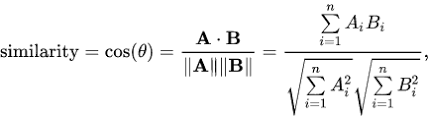

## Function to predict ratings 
### Choosing neighbours based on similarity threshold (<0.4)

In [35]:
#function to predict ratings
def calculate_ratings(id_movie, id_user, similarity_threshold):
    if id_movie in df_ratings:
        cosine_scores = similarity_matrix_df[id_user] #similarity of id_user with every other user
        ratings_scores = df_ratings[id_movie]      #ratings of every other user for the movie id_movie
        
        #selecting nearest neighbour above the function defined threshold parameter
        index_below_threshold = cosine_scores[cosine_scores<similarity_threshold].index
        index_below_threshold
        ratings_scores=ratings_scores.drop(index_below_threshold)
        cosine_scores=cosine_scores.drop(index_below_threshold)
    
        #won't consider users who haven't rated id_movie so drop similarity scores and ratings corresponsing to np.nan
        index_not_rated = ratings_scores[ratings_scores.isnull()].index
        ratings_scores = ratings_scores.dropna()
        cosine_scores = cosine_scores.drop(index_not_rated)
        
        
        #calculating rating by weighted mean of ratings and cosine scores of the users who have rated the movie
        if np.dot(ratings_scores, cosine_scores)==0 or np.isnan(np.dot(ratings_scores, cosine_scores)):    #when dot product of ratings and cosine scores is 0 or null
            return 2.5
        else:
            ratings_movie = np.dot(ratings_scores, cosine_scores)/cosine_scores.sum()
            return ratings_movie
    else:
        return 2.5



In [36]:
X_test

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100570,610,96079,4.0
100571,610,96610,5.0
100572,610,96811,4.0
100573,610,96815,3.5


## Function to evaluate test data and return MAE

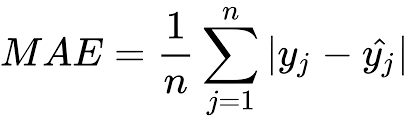

In [37]:
#evaluates on test set

def eval_test_data(X_test, threshold):
    user_movie_pairs = zip(X_test['movieId'], X_test['userId'])
    predicted_ratings = np.array([calculate_ratings(movie, user,threshold) for (movie,user) in user_movie_pairs])
    true_ratings = np.array(X_test['rating'])
    score = mean_absolute_error(true_ratings, predicted_ratings)
    return score
    #return user_movie_pairs,predicted_ratings, true_ratings
                                                     

## Main

In [38]:
i=1
a=[]  #to store MAE of each fold
print("USER BASED APPROACH\n")
print("Mean Absolute Errors\n")
for train_index, test_index in skf.split(X, y):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[train_index], y.loc[test_index], y.loc[test_index]
    
    df_ratings = X_train.pivot(index='userId', columns='movieId', values='rating')  #sparse dataframe
    df_ratings2 = df_ratings.copy().fillna(0) #fill nan by zeros
    similarity_matrix = cosine_similarity(df_ratings2, df_ratings2)  #similarity matrix
    similarity_matrix_df = pd.DataFrame(similarity_matrix, index=df_ratings.index, columns=df_ratings.index)  #dataframe
    
    e=eval_test_data(X_test, threshold=0.4)
    a.append(e)
    print("Fold ", i, ": ", e)  #Calling eval_test_data() function to get MAE for each fold
    
    i+=1

print("Average MAE: ", np.average(a))

USER BASED APPROACH

Mean Absolute Errors

Fold  1 :  0.13492015133968238
Fold  2 :  0.11967964073969871
Fold  3 :  0.12414256602283553
Fold  4 :  0.13613171327592397
Fold  5 :  0.23685444368928724
Average MAE:  0.15034570301348554


# ITEM BASED APPROACH

## Ratings Matrix -  MovieID vs UserID

In [39]:
df_ratings = X_train.pivot(index='movieId', columns='userId', values='rating')  #sparse dataframe
df_ratings2 = df_ratings.copy().fillna(0) #fill nan by zeros
df_ratings

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
similarity_matrix = cosine_similarity(df_ratings2, df_ratings2)  #similarity matrix
similarity_matrix_df = pd.DataFrame(similarity_matrix, index=df_ratings.index, columns=df_ratings.index)  #dataframe
similarity_matrix_df


movieId,1,2,3,4,5,6,7,8,9,10,...,175475,175569,176371,177593,177765,183897,185029,187541,187593,189043
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.410562,1.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.296917,0.282438,1.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035573,0.106415,0.092406,1.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.308762,0.287795,0.417802,0.188376,1.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183897,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
185029,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
187541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Function to predict ratings 
### Choosing neighbours based on similarity threshold (top 40 neighbours)

In [42]:
#function to perdict ratings
def calculate_ratings(id_movie, id_user, top_k_similar): 
    if id_user in df_ratings:
        cosine_scores = similarity_matrix_df[id_movie] #similarity of id_movie with every other movie
        ratings_scores = df_ratings[id_user]      #ratings of every movie for the user id_user
    
        #won't consider movies that haven't been rated by id_user so drop similarity scores and ratings corresponsing to np.nan
        index_not_rated = ratings_scores[ratings_scores.isnull()].index
        ratings_scores = ratings_scores.dropna()
        cosine_scores = cosine_scores.drop(index_not_rated)
        
        #selecting top k nearest neighbour based on the function defined threshold
        index_within_threshold=cosine_scores.nlargest(top_k_similar).index.values
        ratings_scores=ratings_scores[cosine_scores.nlargest(top_k_similar).index.values]
        cosine_scores=cosine_scores[cosine_scores.nlargest(top_k_similar).index.values]
        
        #calculating rating by weighted mean of ratings and cosine scores of the movies that have been rated by the user
        if np.dot(ratings_scores, cosine_scores)==0 or np.isnan(np.dot(ratings_scores, cosine_scores)):    #when dot product of ratings and cosine scores is 0 or null
            return 2.5
        else:
            ratings_movie = np.dot(ratings_scores, cosine_scores)/cosine_scores.sum()
            return ratings_movie
    else:
        return 2.5



## Function to evaluate test data and return MAE

In [43]:
#evaluates on test set


def eval_test_data(X_test, threshold):
    user_movie_pairs = zip(X_test['movieId'], X_test['userId'])
    predicted_ratings = np.array([calculate_ratings(movie, user,threshold) for (movie,user) in user_movie_pairs])
    true_ratings = np.array(X_test['rating'])
    score = mean_absolute_error(true_ratings, predicted_ratings)
    return score
    #return user_movie_pairs,predicted_ratings, true_ratings
                                                     

## Main

In [44]:
i=1
a=[]  #to store MAE of each fold
print("ITEM BASED APPROACH\n")
print("Mean Absolute Errors\n")
for train_index, test_index in skf.split(X, y):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[train_index], y.loc[test_index], y.loc[test_index]
    
    df_ratings = X_train.pivot(index='movieId', columns='userId', values='rating')  #ratings matrix - sparse dataframe
    df_ratings2 = df_ratings.copy().fillna(0) #fill nan by zeros
    similarity_matrix = cosine_similarity(df_ratings2, df_ratings2)  #similarity matrix
    similarity_matrix_df = pd.DataFrame(similarity_matrix, index=df_ratings.index, columns=df_ratings.index)  #dataframe
    
    e=eval_test_data(X_test, threshold=40)
    a.append(e)
    print("Fold ", i, ": ", e)  #Calling eval_test_data() function to get MAE for each fold
    
    i+=1

print("Average MAE: ", np.average(a))

ITEM BASED APPROACH

Mean Absolute Errors

Fold  1 :  0.6092825958035236
Fold  2 :  0.6121723280265391
Fold  3 :  0.6122349066154557
Fold  4 :  0.6115119338584573
Fold  5 :  0.6059735597392076
Average MAE:  0.6102350648086367
